In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import random
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess

#### Load all necessary data (test images and labels, metrics and accuracies, and labels predicted by the models)

In [61]:
images_reduced_augmented_test = np.load('/ai_project/modelling_output/images_reduced_augmented_test.npy')
labels_reduced_augmented_test = np.load('/ai_project/modelling_output/labels_reduced_augmented_test.npy', allow_pickle=True)

In [64]:
neighborhood_accuracies = pd.read_csv('/ai_project/to_read/neighborhood_accuracies.csv')
results_metrics = pd.read_csv('/ai_project/to_read/results_metrics.csv')

In [67]:
labels_reduced_augmented_predicted_resnet = np.load('/ai_project/modelling_output/predicted_neighborhoods_reduced_augmented_resnet.npy', allow_pickle=True)
labels_reduced_augmented_predicted_en = np.load('/ai_project/modelling_output/predicted_neighborhoods_reduced_augmented_en.npy', allow_pickle=True)
label_encoder_reduced_augmented = joblib.load('/ai_project/modelling_output/label_encoder_reduced_augmented.pkl')

In [68]:
print('Test accuracy of ResNet50 (original): ' + str(round(results_metrics.iloc[0,4], 3)) + '\n')
print('Test accuracy on top-2 predictions of ResNet50 (original): ' + str(round(results_metrics.iloc[0,5], 3)) + '\n')

Test accuracy of ResNet50 (original): 0.836

Test accuracy on top-2 predictions of ResNet50 (original): 0.932



In [69]:
print('Test accuracy of ResNet50 (reduced and augmented): ' + str(round(results_metrics.iloc[1,4], 3)) + '\n')
print('Test accuracy on top-2 predictions of ResNet50 (reduced and augmented): ' + str(round(results_metrics.iloc[1,5], 3)) + '\n')

Test accuracy of ResNet50 (reduced and augmented): 0.739

Test accuracy on top-2 predictions of ResNet50 (reduced and augmented): 0.897



In [70]:
print('Test accuracy of EfficientNet (reduced and augmented): ' + str(round(results_metrics.iloc[2,4], 3)) + '\n')
print('Test accuracy on top-2 predictions of EfficientNet (reduced and augmented): ' + str(round(results_metrics.iloc[2,5], 3)) + '\n')

Test accuracy of EfficientNet (reduced and augmented): 0.765

Test accuracy on top-2 predictions of EfficientNet (reduced and augmented): 0.905



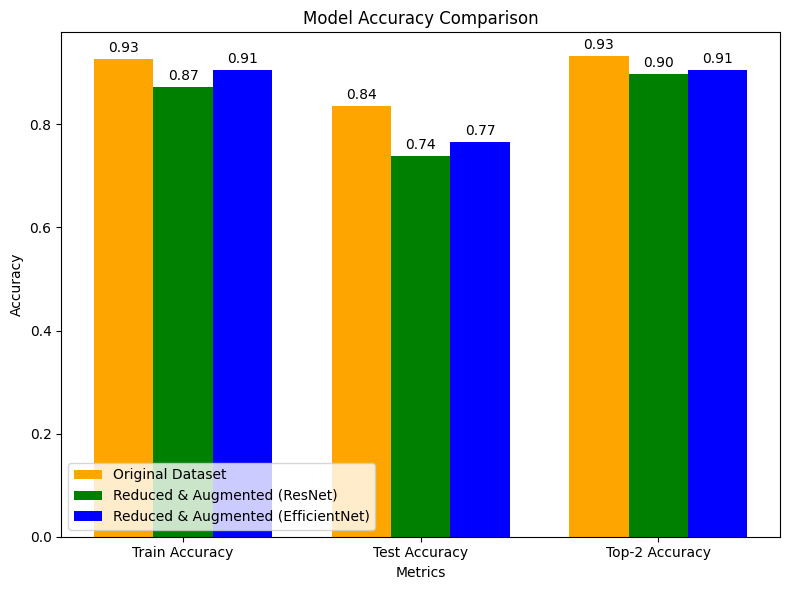

In [71]:
train_accuracy_original = results_metrics.iloc[0, 2]
test_accuracy_original = results_metrics.iloc[0, 4]
top2_accuracy_original = results_metrics.iloc[0, 5]

train_accuracy_augmented_resnet = results_metrics.iloc[1, 2]
test_accuracy_augmented_resnet = results_metrics.iloc[1, 4]
top2_accuracy_augmented_resnet = results_metrics.iloc[1, 5]

train_accuracy_augmented_en = results_metrics.iloc[2, 2]
test_accuracy_augmented_en = results_metrics.iloc[2, 4]
top2_accuracy_augmented_en = results_metrics.iloc[2, 5]

categories = ['Train Accuracy', 'Test Accuracy', 'Top-2 Accuracy']
original_values = [train_accuracy_original, test_accuracy_original, top2_accuracy_original]
resnet_values = [train_accuracy_augmented_resnet, test_accuracy_augmented_resnet, top2_accuracy_augmented_resnet]
efficientnet_values = [train_accuracy_augmented_en, test_accuracy_augmented_en, top2_accuracy_augmented_en]

x = np.arange(len(categories))  
width = 0.25  

colors = ['orange', 'green', 'blue']  

fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width, original_values, width, label='Original Dataset', color=colors[0])
bars2 = ax.bar(x, resnet_values, width, label='Reduced & Augmented (ResNet)', color=colors[1])
bars3 = ax.bar(x + width, efficientnet_values, width, label='Reduced & Augmented (EfficientNet)', color=colors[2])

ax.set_xlabel('Metrics')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

/var/folders/vd/hvjkn6r967gbp6srtfrlgnz40000gn/T/ipykernel_2619/98537568.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper right')


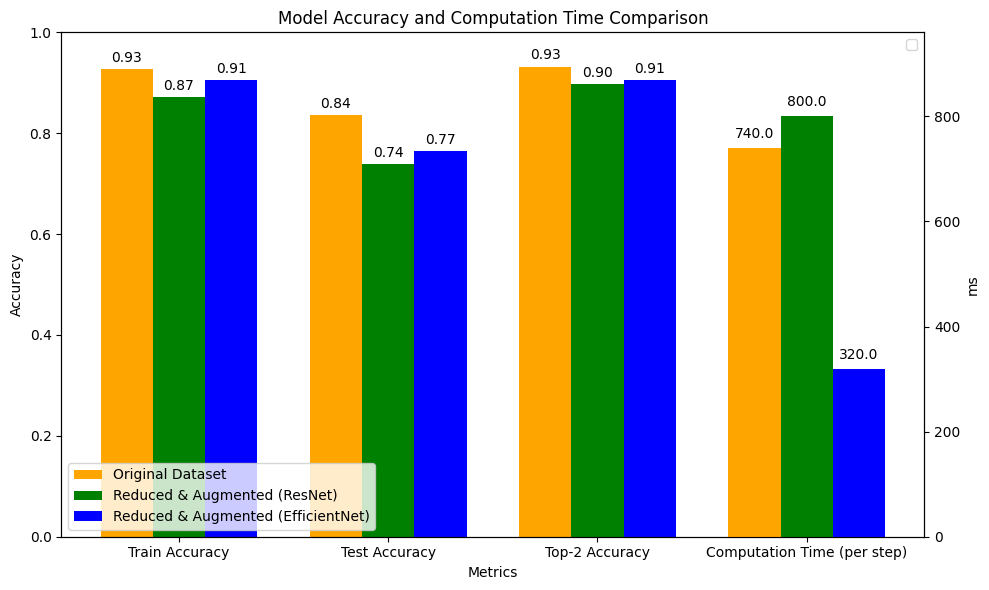

In [84]:
categories = ['Train Accuracy', 'Test Accuracy', 'Top-2 Accuracy', 'Computation Time (per step)']
original_values = [results_metrics.iloc[0, 2], results_metrics.iloc[0, 4], results_metrics.iloc[0, 5], results_metrics.iloc[0, 6]]  
resnet_values = [results_metrics.iloc[1, 2], results_metrics.iloc[1, 4], results_metrics.iloc[1, 5], results_metrics.iloc[1, 6]]
efficientnet_values = [results_metrics.iloc[2, 2], results_metrics.iloc[2, 4], results_metrics.iloc[2, 5], results_metrics.iloc[2, 6]]

x = np.arange(len(categories)) 
width = 0.25  
colors = ['orange', 'green', 'blue']

fig, ax1 = plt.subplots(figsize=(10, 6))

bars1 = ax1.bar(x[:-1] - width, original_values[:-1], width, label='Original Dataset', color=colors[0])
bars2 = ax1.bar(x[:-1], resnet_values[:-1], width, label='Reduced & Augmented (ResNet)', color=colors[1])
bars3 = ax1.bar(x[:-1] + width, efficientnet_values[:-1], width, label='Reduced & Augmented (EfficientNet)', color=colors[2])

ax1.set_xlabel('Metrics')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy and Computation Time Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend(loc='lower left')

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), 
                     textcoords="offset points",
                     ha='center', va='bottom')

ax2 = ax1.twinx()
ax2.set_ylabel('ms')

bars4 = ax2.bar(x[-1] - width, original_values[-1], width, color=colors[0])
bars5 = ax2.bar(x[-1], resnet_values[-1], width, color=colors[1])
bars6 = ax2.bar(x[-1] + width, efficientnet_values[-1], width, color=colors[2])

for bars in [bars4, bars5, bars6]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  
                     textcoords="offset points",
                     ha='center', va='bottom')

ax1.set_ylim(0, 1) 
ax2.set_ylim(0, max(original_values[-1], resnet_values[-1], efficientnet_values[-1]) * 1.2)  # Computation time scale

ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


The bar chart presents a comparative analysis of model accuracy and computation time for three datasets: the original dataset using ResNet, the reduced and augmented dataset using ResNet, and the reduced and augmented dataset using EfficientNet. 

All three models achieves high train accuracy above 0.85. Surprisingly, the highest performance was achieved by the original dataset (0.93), indicating strong learning capability without data reduction or augmentation.

Test accuracy levels indicate a decline in generalization performance, however test accuracy above 0.7 in all three models reflects strong performance of the models. On the reduced and augmented dataset, EfficientNet model seems to perform a bit better than the Resnet model.

Top-2 accuracy reaches the levels of train accuracy, and even exceeds it in reduced and augmented dataset using ResNet.

In addition to accuracy, computation time is an important factor to consider. ResNet based models has the highest computational times, whereas the Efficient-Net model demonstrates, on average, 2.5 times shorter computation time. 

This suggests that EfficientNet-based augmentation offers a balance between relatively high accuracy and significantly reduced computation time.

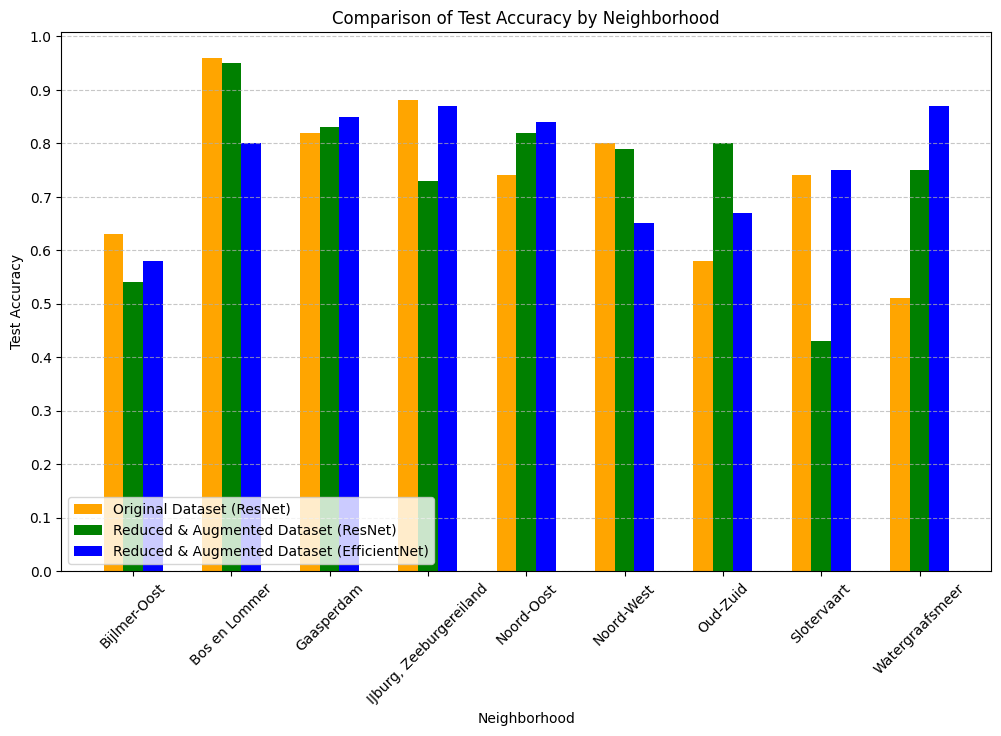

In [73]:
bar_width = 0.2 

neighborhoods_original = list(neighborhood_accuracies.iloc[:,0])
accuracies_original = list(neighborhood_accuracies.iloc[:,1])

neighborhoods_augmented = list(neighborhood_accuracies.iloc[:,0])
accuracies_augmented = list(neighborhood_accuracies.iloc[:,2])

neighborhoods_en = list(neighborhood_accuracies.iloc[:,0])
accuracies_en = list(neighborhood_accuracies.iloc[:,3])

neighborhood_labels = [str(d) for d in neighborhoods_augmented]

x = np.arange(len(neighborhood_labels))

plt.figure(figsize=(12, 7))

plt.bar(x - bar_width, accuracies_original, width=bar_width, color='orange', label='Original Dataset (ResNet)')
plt.bar(x, accuracies_augmented, width=bar_width, color='green', label='Reduced & Augmented Dataset (ResNet)')
plt.bar(x + bar_width, accuracies_en, width=bar_width, color='blue', label='Reduced & Augmented Dataset (EfficientNet)')

plt.xlabel('Neighborhood')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy by Neighborhood')
plt.xticks(x, neighborhood_labels, rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(loc='lower left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

As expected, model based on original dataset performs best on the most-frequent neighborhood (Bos en Lommer). On average, Bijlmer-Oost has the worst prediction accuracy across all-three models, achieving around 55% test accuracy. This might be caused by similar infrastructure seen in different neighborhoods, e.g. in Noord-West.

Model based on the reduced and augmented dataset using EfficientNet outperforms other models in neighborhoods: Gaasperdam, Noord-Oost and Watergraafsmeer.

In overall, predictions of the model based on the reduced and augmented dataset using EfficientNet are the most stable through neighborhoods, with only one neighborhood below 60% test accuracy threshold (Bijlmer-Oost).

### Accuracy improvement ratio

In [74]:
acc_improvement_original = (results_metrics.iloc[0,4] - results_metrics.iloc[0,1]) / (results_metrics.iloc[0,1])
print('Accuracy improvement of original dataset (ResNet): ' + str(round(acc_improvement_original, 3)))

Accuracy improvement of original dataset (ResNet): 0.931


In [75]:
acc_improvement_reduced_augmented = (results_metrics.iloc[1,4] - results_metrics.iloc[1,1]) / (results_metrics.iloc[1,1])
print('Accuracy improvement of reduced and augmented dataset  (ResNet): ' + str(round(acc_improvement_reduced_augmented, 3)))

Accuracy improvement of reduced and augmented dataset  (ResNet): 4.912


In [76]:
acc_improvement_reduced_augmented_en = (results_metrics.iloc[2,4] - results_metrics.iloc[2,1]) / (results_metrics.iloc[2,1])
print('Accuracy improvement of reduced and augmented dataset  (ResNet): ' + str(round(acc_improvement_reduced_augmented_en, 3)))

Accuracy improvement of reduced and augmented dataset  (ResNet): 5.12


#### Accuracy improvement ratio indicates that the model based on the reduced and augmented dataset using EfficientNet achieves the best improvement throughout the models. 

Significantly lower accuracy improvement of the model based on the original dataset is caused by relatively high starting point, i.e. 'successful blind guess' probability of 0.433.

In [77]:
correct_indices = [i for i in range(len(labels_reduced_augmented_predicted_en)) if labels_reduced_augmented_predicted_en[i] == labels_reduced_augmented_test[i]]
incorrect_indices = [i for i in range(len(labels_reduced_augmented_predicted_en)) if labels_reduced_augmented_predicted_en[i] != labels_reduced_augmented_test[i]]

correct_examples = random.sample(correct_indices, min(5, len(correct_indices)))
incorrect_examples = random.sample(incorrect_indices, min(5, len(incorrect_indices)))

Correctly Predicted Examples:


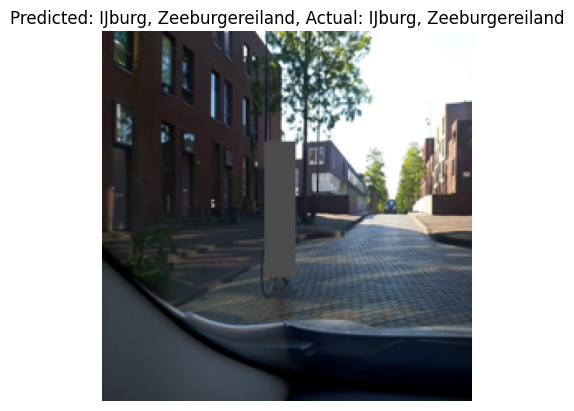

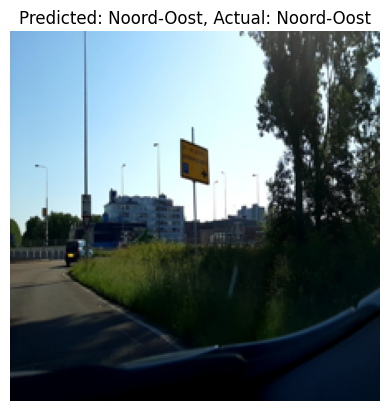

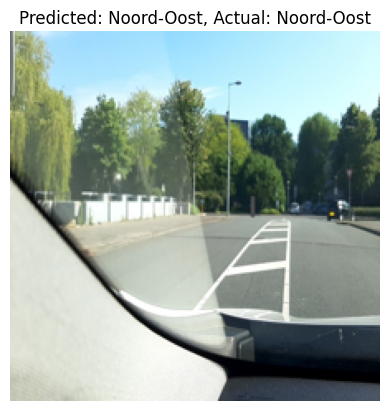

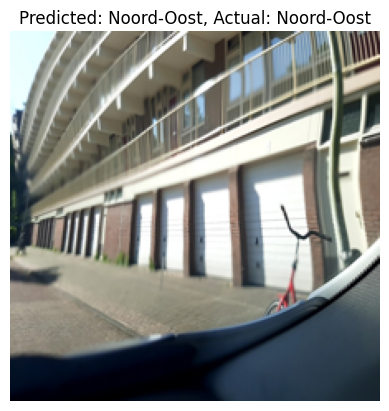

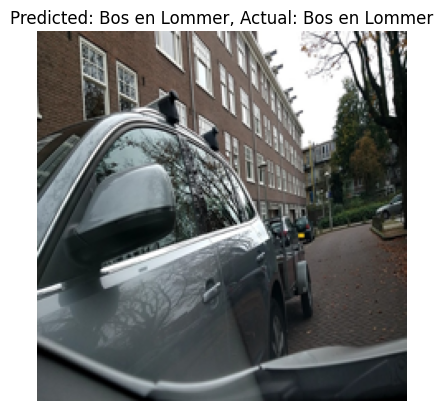

In [78]:
print("Correctly Predicted Examples:")
for i in correct_examples:
    plt.imshow(images_reduced_augmented_test[i])
    plt.title(f"Predicted: {labels_reduced_augmented_predicted_en[i]}, Actual: {labels_reduced_augmented_test[i]}")
    plt.axis('off')
    plt.show()


Incorrectly Predicted Examples:


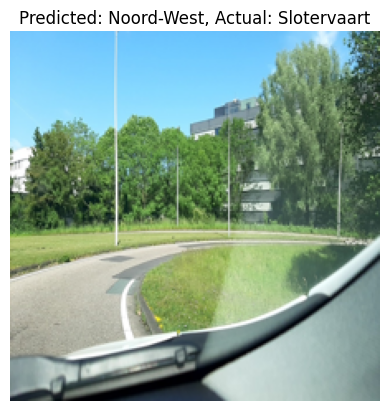

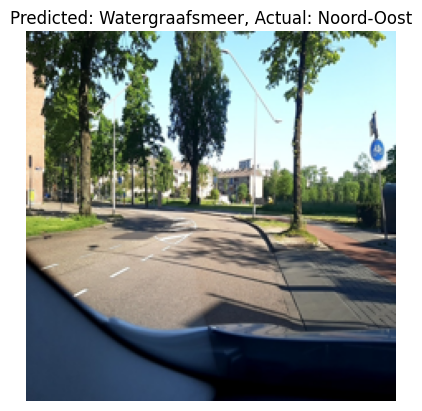

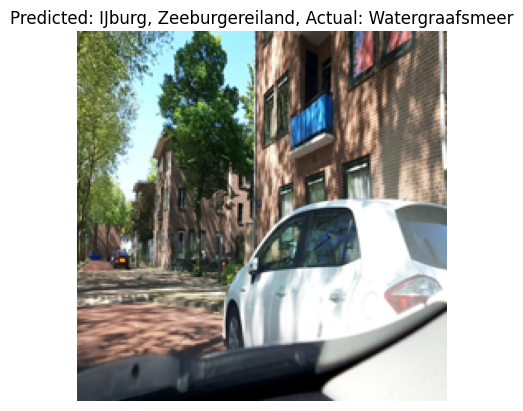

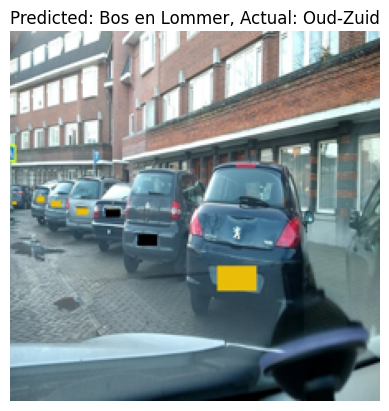

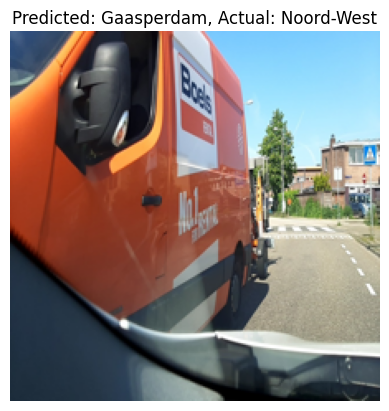

In [79]:
print("Incorrectly Predicted Examples:")
for i in incorrect_examples:
    plt.imshow(images_reduced_augmented_test[i])
    plt.title(f"Predicted: {labels_reduced_augmented_predicted_en[i]}, Actual: {labels_reduced_augmented_test[i]}")
    plt.axis('off')
    plt.show()